### EXAMEN - Convocatoria 1 - Programación
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

In [18]:
# Librerías
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

#### 1) Partición de datos externa (1 punto)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

In [19]:
# Cargamos los datos 
data = np.load('dataset_exam.npy', allow_pickle=True)

print(f"Base de datos.\nDimensiones: {np.shape(data)}\n")
print(data)

# Separación de los atributos de la clase
X = data[:, :-1]
y = data[:, -1]

print("\nDimensiones de los atributos: {}".format(np.shape(X)))
print("Dimensiones de la clase:", np.shape(y))

# Partición de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDimensiones de X_train:", np.shape(X_train))
print("Dimensiones de X_test:", np.shape(X_test))
print("Dimensiones de y_train:", np.shape(y_train))
print("Dimensiones de y_test:", np.shape(y_test))

# Comprobación del balanceo de los datos
labels_train, counts_train = np.unique(y_train, return_counts=True)
labels_test, counts_test = np.unique(y_test, return_counts=True)

print(f"\nEtiquetas de entrenamiento: {labels_train}. Número de veces que se repiten: {counts_train}")
print(f"Etiquetas de test: {labels_test}. Número de veces que se repiten: {counts_test}")

Base de datos.
Dimensiones: (492, 9)

[[ 0.          4.          1.         ...  8.2603626   7.37490176
   0.        ]
 [ 0.          4.          0.         ... 10.9370737  10.30131004
   0.        ]
 [ 0.          3.          1.         ... 10.69134847 11.45671439
   0.        ]
 ...
 [ 0.          2.          0.         ...  1.94458971  8.88390924
   0.        ]
 [ 0.          3.          2.         ...  1.92895933  9.03304966
   1.        ]
 [ 0.          4.          0.         ...  2.0478487   8.86096477
   0.        ]]

Dimensiones de los atributos: (492, 8)
Dimensiones de la clase: (492,)

Dimensiones de X_train: (393, 8)
Dimensiones de X_test: (99, 8)
Dimensiones de y_train: (393,)
Dimensiones de y_test: (99,)

Etiquetas de entrenamiento: [0. 1.]. Número de veces que se repiten: [195 198]
Etiquetas de test: [0. 1.]. Número de veces que se repiten: [51 48]


#### 2) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [20]:
# Cargar el estandarizador
standarizer = preprocessing.StandardScaler()

# Entrenamiento del modelo con los datos de entrenamiento
standarizer.fit(X_train)

# Aplicación del modelo a los datos de entrenamiento y test
X_train_std = standarizer.transform(X_train)
X_test_std = standarizer.transform(X_test)

print("Datos estandarizados:\n")
print("Atributos entrenamiento:\n{}".format(X_train_std[:10]))
print("\nAtributos test:\n{}".format(X_test_std[:10]))

Datos estandarizados:

Atributos entrenamiento:
[[-0.53714485 -0.41701989 -0.37232487 -0.42469918  0.88784615 -0.54017298
  -1.96779643 -2.17643457]
 [ 1.86169522 -0.41701989 -1.25913502  0.31710872  0.88784615  0.33529217
   0.47045818  0.57704227]
 [-0.53714485  0.63354944 -0.37232487 -1.16650709  1.78252188 -2.29090328
  -0.78155436 -2.19168937]
 [ 1.86169522  0.63354944 -1.25913502  0.31710872  0.88784615 -2.1946854
  -0.70088243 -2.11512786]
 [-0.53714485 -1.46758922  0.51448528  0.31710872 -0.90150532  0.45491681
   0.15483585  0.27805077]
 [-0.53714485 -0.41701989 -1.25913502  1.05891663 -0.00682959  0.37593521
   0.24695695  0.4463326 ]
 [-0.53714485  0.63354944  1.40129542 -0.42469918 -0.90150532 -1.93607511
  -1.94807861  0.17303076]
 [ 1.86169522 -0.41701989 -0.37232487  0.31710872 -0.00682959 -0.56594614
  -1.96361207 -2.21273662]
 [ 1.86169522  0.63354944  2.28810557 -0.42469918 -1.79618105 -0.30289658
   1.65651072  0.46205349]
 [-0.53714485 -0.41701989 -0.37232487  0.317

#### 3) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual information para clasificación seleccionando un percentile=90. (Recordad la función "SelectPercentile")

In [21]:
# Carga del selector
selector = SelectPercentile(score_func=mutual_info_classif, percentile=90)

# Entrenamiento del selector con el 80% de los datos estandarizados
selector.fit(X_train_std, y_train)

# Aplicación del selector a los datos
X_train_selected = selector.transform(X_train_std)
X_test_selected = selector.transform(X_test_std)

print(f"Dimensiones datos de entrenamiento: {np.shape(X_train_selected)}.\n\nDatos de entrenamiento:\n{X_train_selected[:10]}")
print(f"\nDimensiones datos de test: {np.shape(X_test_selected)}.\n\nDatos de test:\n{X_test_selected[:10]}")

Dimensiones datos de entrenamiento: (393, 7).

Datos de entrenamiento:
[[-0.53714485 -0.41701989 -0.37232487 -0.42469918 -0.54017298 -1.96779643
  -2.17643457]
 [ 1.86169522 -0.41701989 -1.25913502  0.31710872  0.33529217  0.47045818
   0.57704227]
 [-0.53714485  0.63354944 -0.37232487 -1.16650709 -2.29090328 -0.78155436
  -2.19168937]
 [ 1.86169522  0.63354944 -1.25913502  0.31710872 -2.1946854  -0.70088243
  -2.11512786]
 [-0.53714485 -1.46758922  0.51448528  0.31710872  0.45491681  0.15483585
   0.27805077]
 [-0.53714485 -0.41701989 -1.25913502  1.05891663  0.37593521  0.24695695
   0.4463326 ]
 [-0.53714485  0.63354944  1.40129542 -0.42469918 -1.93607511 -1.94807861
   0.17303076]
 [ 1.86169522 -0.41701989 -0.37232487  0.31710872 -0.56594614 -1.96361207
  -2.21273662]
 [ 1.86169522  0.63354944  2.28810557 -0.42469918 -0.30289658  1.65651072
   0.46205349]
 [-0.53714485 -0.41701989 -0.37232487  0.31710872  0.17189182  0.98282572
   0.85428384]]

Dimensiones datos de test: (99, 7).



#### 4) Comparación de modelos de clasificación mediante validación cruzada (3 puntos)
Instrucciones:

- Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine.
- La optimización de hiperparámetros debe realizarse de manera automática. (Recordad la función "GridSearchCV").
- La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [22]:
# Definir los modelos
logistic_regression_model = LogisticRegression()
svm_model = SVC(probability=True)

# Parámetros que se van a explorar en cada modelo
logistic_regression_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ["linear", "rbf", "poly", "sigmoid"]}

# Objetos GridSearchCV para regresión logística y SVM
logistic_grid = GridSearchCV(logistic_regression_model, logistic_regression_params, cv=5)
svm_grid = GridSearchCV(svm_model, svm_params, cv=5)

# Ajuste de los modelos a los datos
logistic_grid.fit(X_train_selected, y_train)
svm_grid.fit(X_train_selected, y_train)

# Resultados de media y desviación típica para cada uno de los parámetros
logistic_scores_mean = logistic_grid.cv_results_['mean_test_score'][logistic_grid.best_index_]
logistic_scores_std = logistic_grid.cv_results_['std_test_score'][logistic_grid.best_index_]
svm_scores_mean = svm_grid.cv_results_['mean_test_score'][svm_grid.best_index_]
svm_scores_std = svm_grid.cv_results_['std_test_score'][svm_grid.best_index_]

print(f"Logistic Regression: {logistic_scores_mean:.4f} +/- {logistic_scores_std:.4f}")
print(f"Support Vector Machine: {svm_scores_mean:.4f} +/- {svm_scores_std:.4f}")

Logistic Regression: 0.6819 +/- 0.0489
Support Vector Machine: 0.8220 +/- 0.0378


#### 5) Evaluación de los modelos sobre el conjunto de test (2.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test mostrando una tabla de resultados tal que:
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LOGR y SVM

In [23]:
# Obtención de los mejores parámetros para el modelo
logistic_scores_mean = logistic_grid.cv_results_['mean_test_score']
best_logistic_index_mean = np.argmax(logistic_scores_mean)
best_logistic_params_mean = logistic_grid.cv_results_['params'][best_logistic_index_mean]

print("Mejores parámetros para Logistic Regression:", best_logistic_params_mean)

svm_scores_mean = svm_grid.cv_results_['mean_test_score']
best_svm_index_mean = np.argmax(svm_scores_mean)
best_svm_params_mean = svm_grid.cv_results_['params'][best_svm_index_mean]

print("Mejores parámetros para Support Vector Machine", best_svm_params_mean)

# Definición de los mejores modelos
best_logistic_regression_model = LogisticRegression(C=10)
best_svm_model = SVC(C=100, gamma=0.1, kernel='rbf', probability=True)

# Entrenamiento de los modelos sobre los datos de entrenamiento utilizando los mejores parámetros
best_logistic_regression_model.fit(X_train_selected, y_train)
best_svm_model.fit(X_train_selected, y_train)

# Predicciones del modelo sobre el test
y_pred_logistic_regression = best_logistic_regression_model.predict(X_test_selected)
y_pred_svm = best_svm_model.predict(X_test_selected)

# Evaluación del rendimiento de los modelos
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_lr = precision_score(y_test, y_pred_logistic_regression)
precision_svm = precision_score(y_test, y_pred_svm)
recall_lr = recall_score(y_test, y_pred_logistic_regression)
recall_svm = recall_score(y_test, y_pred_svm)
f1_lr = f1_score(y_test, y_pred_logistic_regression)
f1_svm = f1_score(y_test, y_pred_svm)
auc_lr = roc_auc_score(y_test, y_pred_logistic_regression)
auc_svm = roc_auc_score(y_test, y_pred_svm)

# Tabla con los resultados obtenidos de los modelos
results_table = {
    'LR': [accuracy_lr, precision_lr, recall_lr, f1_lr, auc_lr],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm, auc_svm]
}

# Mostrar la tabla
print("\nTabla de Resultados:")
print("Metricas       | LOGR            | SVM")
print("------------------------------------------")
print("Precisión      | {:.4f}          | {:.4f}".format(results_table['LR'][1], results_table['SVM'][1]))
print("Sensibilidad   | {:.4f}          | {:.4f}".format(results_table['LR'][2], results_table['SVM'][2]))
print("F-score        | {:.4f}          | {:.4f}".format(results_table['LR'][3], results_table['SVM'][3]))
print("Exactitud      | {:.4f}          | {:.4f}".format(results_table['LR'][0], results_table['SVM'][0]))
print("AUC            | {:.4f}          | {:.4f}".format(results_table['LR'][4], results_table['SVM'][4]))

Mejores parámetros para Logistic Regression: {'C': 10}
Mejores parámetros para Support Vector Machine {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Tabla de Resultados:
Metricas       | LOGR            | SVM
------------------------------------------
Precisión      | 0.6140          | 0.8696
Sensibilidad   | 0.7292          | 0.8333
F-score        | 0.6667          | 0.8511
Exactitud      | 0.6465          | 0.8586
AUC            | 0.6489          | 0.8578


#### 6) Visualización de resultados (1 punto)
- Mostrar la matriz de confusión
- Mostrar en una única figura la comparación de las curvas ROC obtenidas por cada modelo. (Recordad que SVM requiere un parámetro específico en su llamada para poder calcular la curva ROC). 

Matriz de confusión de Logistic Regression:
[[29 22]
 [13 35]]

Matriz de confusión de Support Vector Machine:
[[45  6]
 [ 8 40]]


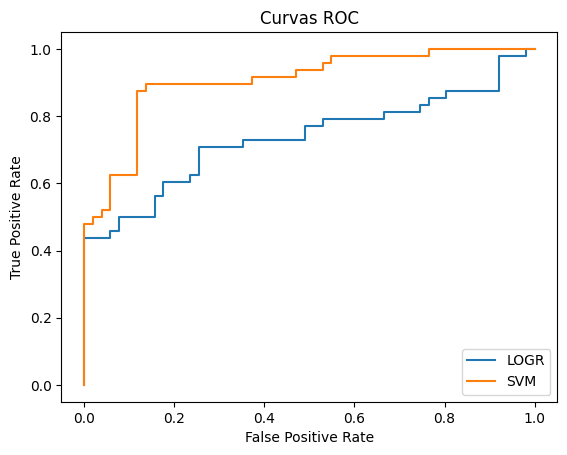

In [24]:
# Matriz de confusión
print("Matriz de confusión de Logistic Regression:\n{}".format(confusion_matrix(y_test, y_pred_logistic_regression)))
print("\nMatriz de confusión de Support Vector Machine:\n{}".format(confusion_matrix(y_test, y_pred_svm)))

# Cálculo de la curva ROC
fpr_lr, tpr_lr, th_lr = roc_curve(y_test, best_logistic_regression_model.predict_proba(X_test_selected)[:, 1])
fpr_svm, tpr_svm, th_svm = roc_curve(y_test, best_svm_model.predict_proba(X_test_selected)[:, 1])

# Representación de las curvas ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='LOGR')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend()
plt.show()

#### 7) Interpretación de resultados (0.5 puntos)
* Justifica brevemente cuál de los dos modelos utilizarías para ponerlo en producción

In [25]:
# Cálculo del área bajo la curva
auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)

print(f"Área bajo la curva de Logistic Regression: {auc_lr:.4f}")
print(f"Área bajo la curva de Support Vector Machine: {auc_svm:.4f}")

Área bajo la curva de Logistic Regression: 0.7349
Área bajo la curva de Support Vector Machine: 0.9044


Basado en el área bajo la curva (AUC), elegiría utilizar 'Support Vector Machine' al ser mayor que el otro modelo, indicando así que tiene una mejor capacidad de discriminación para separar las clases.